#### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy.io import fits

#### Making special catalog

In [20]:
def Table_reader(name):
    local_dir="/home/holman/FILES/"
    local_file = os.path.join(local_dir,name)
    TABLE = Table.read(local_file)
    #names = TABLE['TARGETID']
    return TABLE
    
SV1 = Table_reader("fuji-sv1-dark-combine-dlacatalog.fits")
SV2 = Table_reader("fuji-sv2-dark-combine-dlacatalog.fits")
SV3 = Table_reader("fuji-sv3-dark-combine-dlacatalog.fits")

SV1

TARGET_RA,TARGET_DEC,Z_QSO,TARGETID,S2N,DLAID,CNN_NHI,GP_NHI,CNN_Z_DLA,GP_Z_DLA,CNN_DLA_CONFIDENCE,GP_DLA_CONFIDENCE,ABSORBER_TYPE,NHI,Z_DLA
deg,deg,,,,,1 / cm2,1 / cm2,,,,,,1 / cm2,
float64,float64,float64,int64,float64,bytes21,float64,float64,float64,float64,float64,float64,bytes6,float64,float64
197.14390063990936,24.52098352105162,2.8416229272676015,39628362695576436,2.9235262870788574,39628362695576436000,19.94080352783203,0.0,2.419436357024279,0.0,1.0,0.0,SUBDLA,19.94080352783203,2.419436357024279
196.9679519879933,24.56685640575941,2.241123990212007,39628362691384025,6.799560546875,39628362691384025000,20.049545288085938,0.0,2.2478677553238167,0.0,0.825,0.0,SUBDLA,20.049545288085938,2.2478677553238167
197.3543040445033,24.70854692704085,2.8737682616418354,39628368198500958,1.0403907299041748,39628368198500958000,20.07615852355957,20.851783702199654,2.271700679615158,2.274963735258804,0.7375,0.9998226304399581,DLA,20.851783702199654,2.274963735258804
197.3543040445033,24.70854692704085,2.8737682616418354,39628368198500958,1.0403907299041748,39628368198500958001,19.801815032958984,0.0,2.6471057797637485,0.0,0.4125,0.0,SUBDLA,19.801815032958984,2.6471057797637485
197.3424854277732,24.600798130960488,2.362916162225716,39628362699768732,5.252065181732178,39628362699768732000,19.673324584960938,0.0,2.2575744380625906,0.0,0.8375,0.0,SUBDLA,19.673324584960938,2.2575744380625906
197.3424854277732,24.600798130960488,2.362916162225716,39628362699768732,5.252065181732178,39628362699768732001,20.140607833862305,0.0,2.354749180468047,0.0,0.825,0.0,SUBDLA,20.140607833862305,2.354749180468047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235.79722506136855,31.249824753732305,2.755843324592786,39628507566835190,1.3859853744506836,39628507566835190000,0.0,20.912097414241142,0.0,2.1880284709182556,0.0,0.9999998041806456,DLA,20.912097414241142,2.1880284709182556


In [48]:
match = np.intersect1d(SV1['TARGETID'],SV3['TARGETID'])


84191
83854


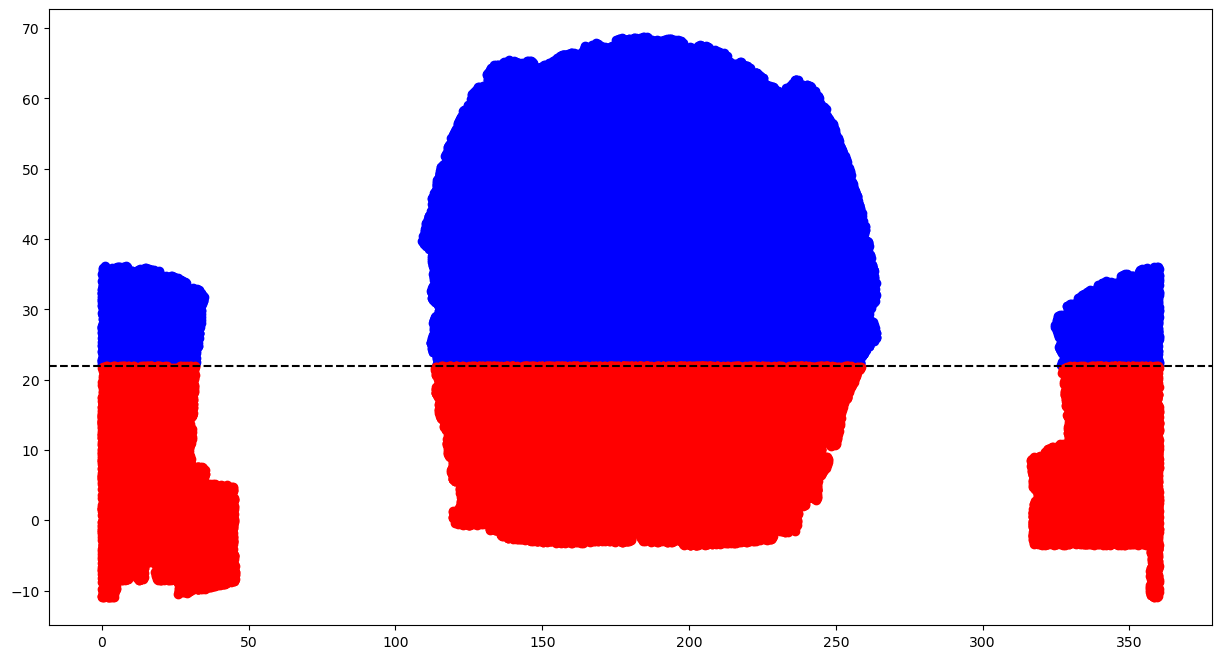

In [7]:
cut = 22

above = dr14[(dr14['DEC']>=cut)]
below = dr14[(dr14['DEC']<cut)]

print(len(above))
print(len(below))



plt.figure(figsize=(15,8))
plt.scatter(above['RA'],above['DEC'], color = 'blue')
plt.scatter(below['RA'],below['DEC'], color = 'red')
#plt.scatter(B['RA'],B['DEC'])
#plt.plot(mw_plane_ra,mw_plane_dec, color = 'red', linestyle = '--')
plt.axhline(22, color = 'black', linestyle = '--')
#plt.xticks(np.arange(0,360,10))

40244
39518


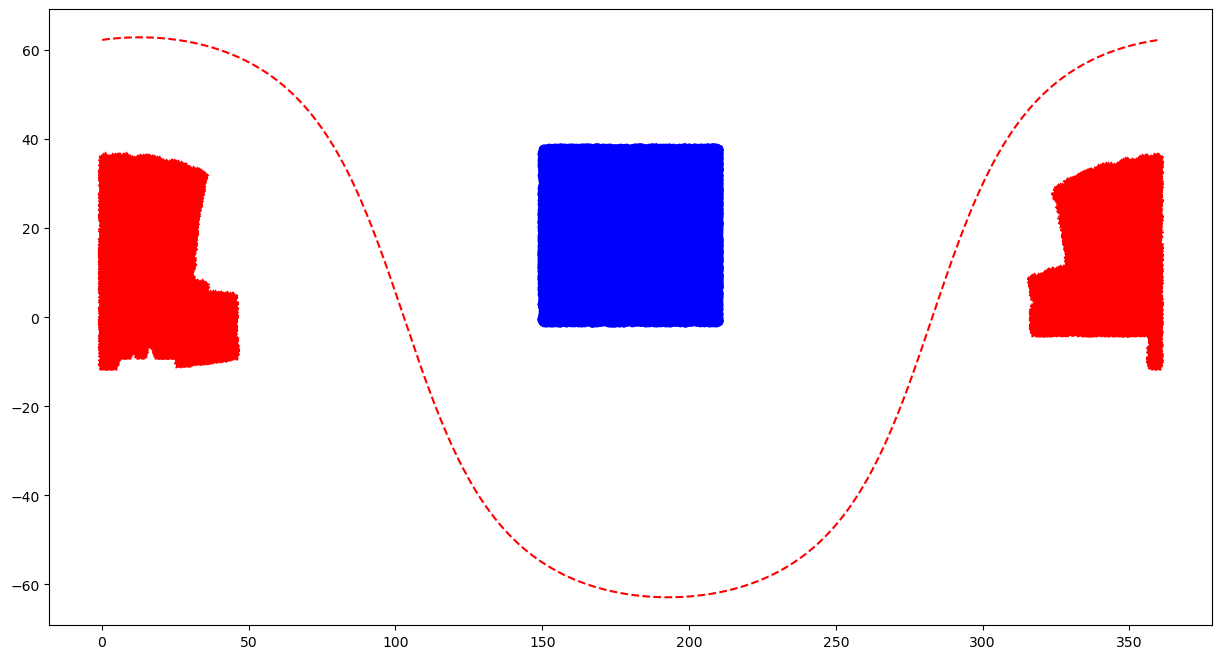

In [8]:
cuts = [150,210,38,-1]

center = dr14[(dr14['RA']>=cuts[0]) & (dr14['RA']<=cuts[1]) & (dr14['DEC']<=cuts[2]) & (dr14['DEC']>=cuts[3])]
sides = dr14[(dr14['RA']<80) | (dr14['RA']>290)]

print(len(center))
print(len(sides))



plt.figure(figsize=(15,8))
plt.scatter(center['RA'],center['DEC'], color = 'blue')
plt.scatter(sides['RA'],sides['DEC'], color = 'red', marker = '*')
#plt.scatter(B['RA'],B['DEC'])
plt.plot(mw_plane_ra,mw_plane_dec, color = 'red', linestyle = '--')
#plt.axhline(22, color = 'black', linestyle = '--')
#plt.xticks(np.arange(0,360,10))


In [18]:
def get_metadata(data):
    ''' Constructs an astropy.table from all forests' metadata 
    '''
    tab = Table()
    for field in ['ra', 'dec', 'z_qso', 'thingid', 'plate', 'mjd', 'fiberid', 'mean_snr', 'p0', 'p1']:
        x = []
        for healpix in data:
            for forest in data[healpix]:
                if field in forest.__dict__ and not forest.__dict__[field] is None:
                    x.append(forest.__dict__[field])
                else:
                    x.append(0)
        tab[field] = np.array(x)

    npix = []
    for healpix in data:
        for forest in data[healpix]:
            if forest.log_lambda is None:
                npix.append(0)
            else:
                npix.append(forest.log_lambda.size)
    tab['npixels'] = np.array(npix)
    
    return tab

Text(0.5, 1.0, 'Stripe 82 QSOs')

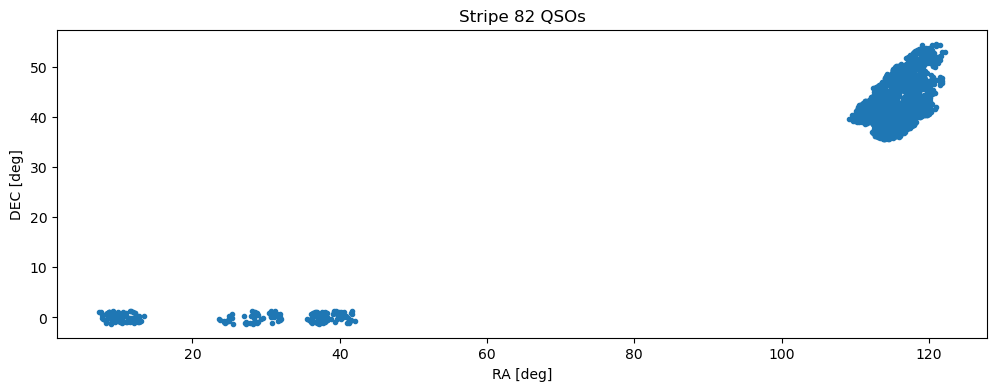

In [19]:
tab = get_metadata(data)

plt.figure(figsize=(12,4))
ra = np.degrees(tab['ra'])
dec = np.degrees(tab['dec'])
plt.plot(ra-360*(ra>300), dec, '.')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.title('Stripe 82 QSOs')

Text(0.5, 0, 'Mean pixel S/N')

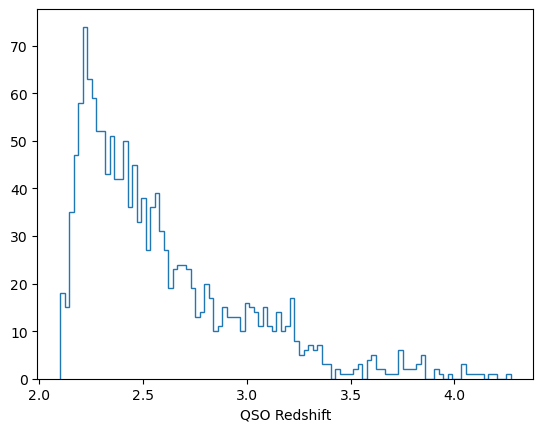

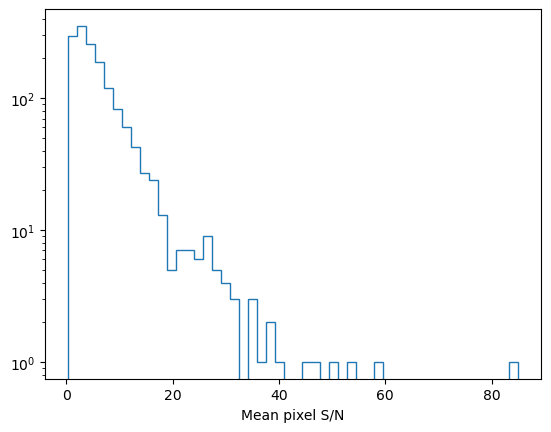

In [20]:
plt.figure()
plt.hist(tab['z_qso'], bins=100, histtype='step')
plt.xlabel('QSO Redshift')

plt.figure()
w = tab['mean_snr'] > 0
plt.hist(tab['mean_snr'][w], bins=50, histtype='step')
plt.yscale('log')
plt.xlabel('Mean pixel S/N')

In [23]:
#-- Define first some DLA parameters
#-- Mask pixels around DLAs below 80% of DLA transmission
Forest.dla_mask_limit = 0.8
#-- Mask width on each side of the absorber central observed wavelength in units 1e-4 (log-wavelength)
Forest.absorber_mask_width = 2.5


#-- Let's first see how the DLA profiles look like
#-- The magic happens in picca.dla, so we create a fake forest to give the DLA class

log_lambda = np.arange(np.log10(3600), np.log10(4600), Forest.delta_log_lambda)
forest = Forest(log_lambda, np.ones_like(log_lambda), np.ones_like(log_lambda),0, 0, 0, 3., 0, 0, 0, 1)

#- z_dla = 2.5, log10(N_HI/cm^2) = 19.0
dla_example1 = DLA(forest, 2.5, 19.0)
#- z_dla = 2.6, log10(N_HI/cm^2) = 21.0
dla_example2 = DLA(forest, 2.6, 21.0)
plt.figure()
plt.plot(10**forest.log_lambda, dla_example1.transmission)
plt.plot(10**forest.log_lambda, dla_example2.transmission)
plt.axhline(Forest.dla_mask_limit, color='k', ls='--')
plt.xlabel(r'Observer-frame wavelength [$\AA$]')
plt.ylabel('DLA Transmission')

TypeError: 'int' object is not subscriptable

In [133]:
#-- Reads DLA information into a dictionary where 
#-- keys are THING_ID and 
#-- values are a list of (z_dla, log10(N_HI)) for this line-of-sight
dlas = io.read_dlas('/home/holman/FILES/cata_eBOSSDR14/DLA_DR14CorRa.fits')

Reading DLA catalog from: /home/holman/FILES/cata_eBOSSDR14/DLA_DR14CorRa.fits
 In catalog: 39023 DLAs
 In catalog: 29476 forests have a DLA




In [134]:
#-- Need to setup a random seed for the Voigt profile calculation
np.random.seed(0)

#-- Loop over forests masking central parts and correcting flux over DLA wings
#-- The magic happens in picca.dla 
num_dlas = 0
for healpix in data:
    for forest in data[healpix]:
        if forest.thingid in dlas:
            for dla in dlas[forest.thingid]:
                dla_z = dla[0]
                dla_nhi = dla[1]
                forest.add_dla(dla_z, dla_nhi)
                num_dlas += 1
tab_dla = get_metadata(data)

TypeError: object of type 'NoneType' has no len()

In [97]:
print(f"Total number of pixels before DLA masking: {np.sum(tab_mask['npixels'])}")
print(f"Total number of pixels after  DLA masking: {np.sum(tab_dla['npixels'])}")
print(f"Total number of pixels masked by DLA: {np.sum(tab_mask['npixels']- tab_dla['npixels'])}")

NameError: name 'tab_mask' is not defined

In [98]:
#-- Minimum number of valid pixels in a forest, 50 is the default in picca_deltas.py
npix_min = 50 
use_constant_weight = False

nforests_before = np.sum([len(forest) for forest in data.values()])

remove_keys = []
for healpix in data:
    forests = []
    for forest in data[healpix]:
        if ((forest.log_lambda is None) or
            len(forest.log_lambda) < npix_min):
            continue

        if np.isnan((forest.flux * forest.ivar).sum()):
            continue

        if (use_constant_weight and
            (forest.flux.mean() <= 0.0 or forest.mean_snr <= 1.0)):
            continue
            
        forests.append(forest)
        
    data[healpix][:] = forests
    
    if len(data[healpix]) == 0:
        remove_keys += [healpix]

    for healpix in remove_keys:
        del data[healpix]

nforests_after = np.sum([len(forest) for forest in data.values()])
print(f"Original  sample has {nforests_before} forests")
print(f"Remaining sample has {nforests_after} forests")

Original  sample has 1543 forests
Remaining sample has 1527 forests


In [140]:
#-- Loop over all forests and fit them
import time

def fit_all_continua():
    t0 = time.time()
    for healpix in data:
        for forest in data[healpix]:
            forest.cont_fit()
    t1 = time.time()
    print(f'Time elapsed fitting all continua: {(t1-t0)/60:.2f} minutes')

In [141]:
fit_all_continua()

RuntimeError: error_p0 is not one of the parameters [p0 p1]